<a href="https://colab.research.google.com/github/Mizoroki-Heck/Kaggle_competition/blob/main/titanic_first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df_train = pd.read_csv("/content/sample_data/train.csv")
df_test = pd.read_csv("/content/sample_data/test.csv")
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
def preprocess(df):

    def normalize(x):
        for i in ",()[].\"'":
            x = x.replace(i, '') # Замена посторонних символов на пробелы в имени
        return x

    def ticket_numbers(x):
        return x.split(' ')[-1] # Разделяем билет на буквенную и числовую части, берем числовую .она в конце.

    def ticket_item(x):
        items = x.split(' ') # Берем буквенную часть билета, если она есть, если нет, то в строку присваиваем None
        if len(items) == 1:
            return 'None'
        return ' '.join(items[0:-1])

    df['Name'] = df['Name'].apply(normalize)
    df['Ticket_Number'] = df['Ticket'].apply(ticket_numbers)
    df['Ticket_item'] = df['Ticket'].apply(ticket_item)
    return df


preprocessed_train_df = preprocess(df_train)
preprocessed_serving_df = preprocess(df_test)

preprocessed_train_df.head(5)





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_Number,Ticket_item
0,1,0,3,Braund Mr Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S,21171,A/5
1,2,1,1,Cumings Mrs John Bradley Florence Briggs Thayer,female,38.0,1,0,PC 17599,71.2833,C85,C,17599,PC
2,3,1,3,Heikkinen Miss Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3101282,STON/O2.
3,4,1,1,Futrelle Mrs Jacques Heath Lily May Peel,female,35.0,1,0,113803,53.1000,C123,S,113803,None
4,5,0,3,Allen Mr William Henry,male,35.0,0,0,373450,8.0500,NaN,S,373450,None


In [ ]:
df_train.isnull().sum() # Смотрим кол-во пропусков, в колонке Возраст 177 пропусков, в "Номер кабины" 687, что сильно больше половины, принимаю решение удалить его.

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Ticket_Number      0
Ticket_item        0
dtype: int64

In [ ]:
df_train.drop(columns = ['Cabin'],axis = 1, inplace=True) # Удаление колонки Cabin


Text(0.5, 1.0, 'Количество погибших')

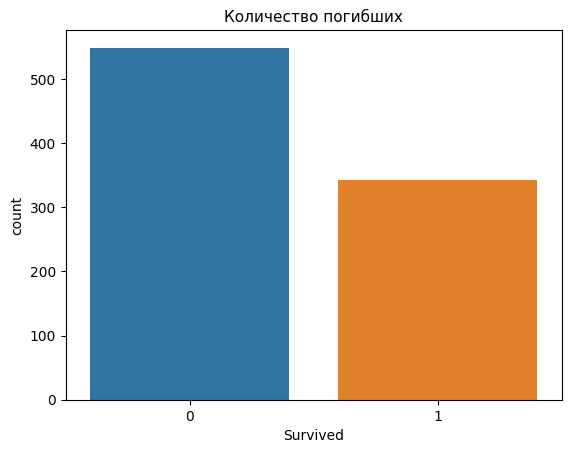

In [ ]:
Count_survived = sns.countplot(x=df_train['Survived']) # Сколько погибло
Count_survived.axes.set_title("Количество погибших", fontsize=11)

Text(0.5, 1.0, 'Зависимость выживаемости от пола')

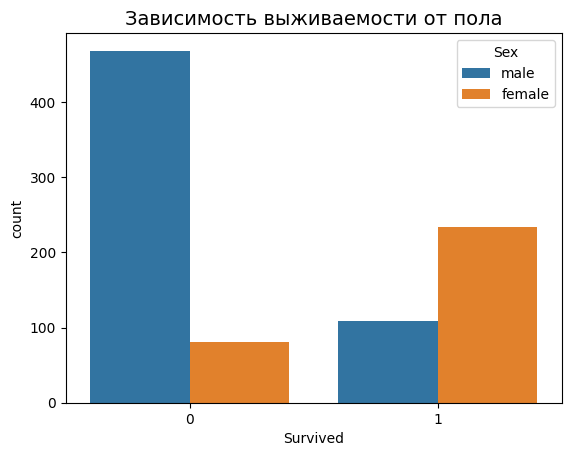

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Survived_sex = sns.countplot(x='Survived', hue='Sex', data=df_train)
Survived_sex.axes.set_title("Зависимость выживаемости от пола", fontsize=14) # Как мы видим мужчин погибло больше

Text(0.5, 1.0, 'Зависимость выживания от количества родственников(братья, сестры, мужья, жены)')

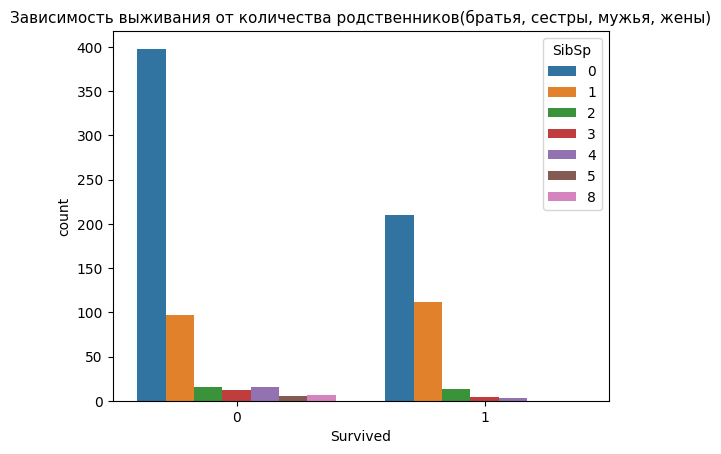

In [ ]:
SibSp_Survived = sns.countplot(x='Survived', hue='SibSp', data=df_train) # Зависимость выживаемости от кол-ва близких (Братья,сестры,Муж, Жена)
SibSp_Survived.axes.set_title("Зависимость выживания от количества родственников(братья, сестры, мужья, жены)", fontsize=11)

Text(0.5, 1.0, 'Зависимость выживаемости от кол-ва близких (Мать, Отец, дочь, сын, падчерица, пасынок)')

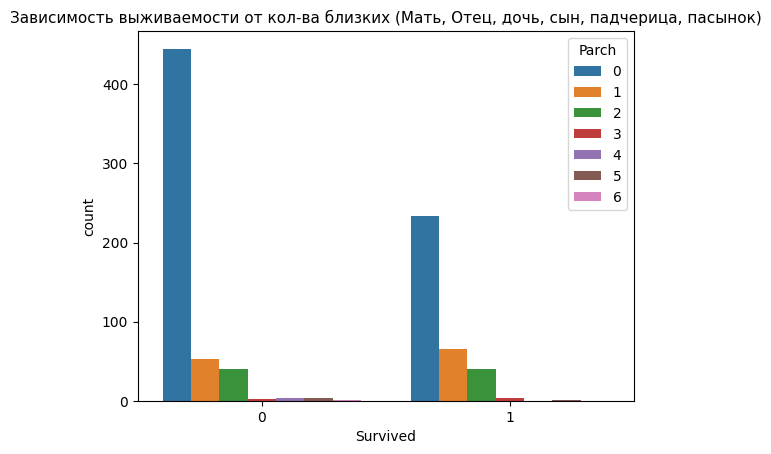

In [ ]:
Parch_Survived = sns.countplot(x='Survived', hue='Parch', data=df_train) # Зависимость выживаемости от кол-ва близких (Мать, Отец, дочь, сын, падчерица, пасынок)
Parch_Survived.axes.set_title("Зависимость выживаемости от кол-ва близких (Мать, Отец, дочь, сын, падчерица, пасынок)", fontsize=11)

Text(0.5, 1.0, 'Зависимость выживаемости от экономического класса')

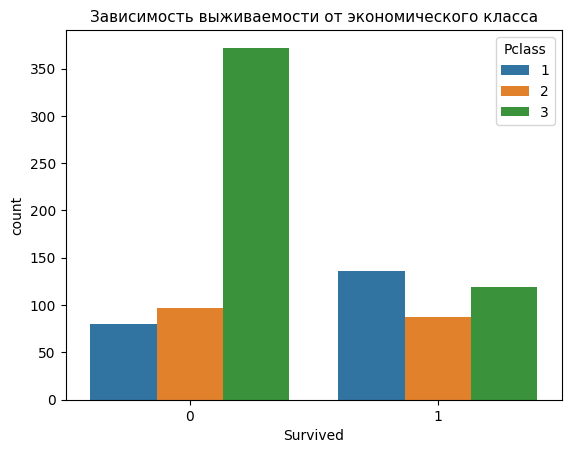

In [ ]:
p_class_survived = sns.countplot(x = 'Survived', hue = 'Pclass', data=df_train) # Видим что погибло больше пассажирова 3 класса каюты, т.е самого низкого
p_class_survived.axes.set_title("Зависимость выживаемости от экономического класса", fontsize=11)

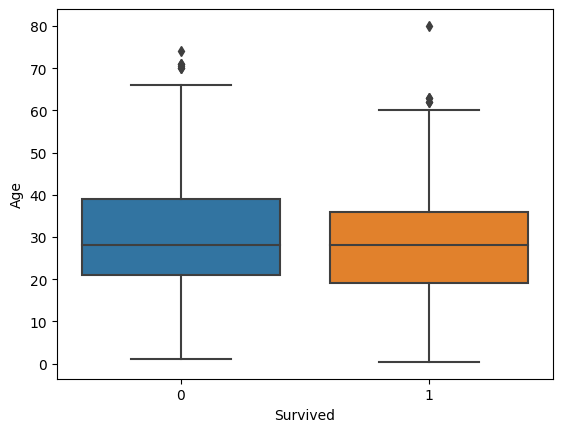

In [ ]:
age_survived = sns.boxplot(data=df_train, x='Survived', y="Age");

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Решил использовать метод ближайших K соседей, для классификации.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

features = ['Pclass', 'Sex', 'SibSp', 'Parch']

X_train = pd.get_dummies(df_train[features])
# y_train = df_train['Survived']
X_test = pd.get_dummies(df_test[features])
# y_test = df_test['Survived']

clf = KNeighborsClassifier()
parametrs = {'n_neighbors': range(1, 20)}
cv = KFold(n_splits=5, shuffle=True, random_state=10)
grid = GridSearchCV(clf, parametrs, cv=cv)
grid.fit(X_train, y_train)
predicted = grid.predict(X_test)



In [ ]:
output = pd.DataFrame({'PassengerId':df_test.PassengerId, 'Survived':predicted})
output.to_csv('my_submission.csv', index=False)